Coffee Lovers Unite!
If caffeine is one of the most popular drugs, then coffee is likely one of the most popular delivery systems for it. Aside from caffeine, people enjoy the wonderful variety of coffee-related drinks. Let’s do a rough investigation of the “market share” by some of the top coffee chains in the United States!

The menuism.com website provides a great collection of data on store locations and chain prevalence. Check out this page for the Starbucks Coffee locations in the United States. Notice that this page only really gives the name of the state and the number of locations in that state. A similarly formatted page is available for many other coffee chains.

# Scrape the Location Counts
1. Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:
* Starbucks
* Dunkin’ Donuts

2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to change state name sinto abbreviations
def stateabb(state):
    state_abbreviations = {
        "Alabama": "AL",
        "Alaska": "AK",
        "Arizona": "AZ",
        "Arkansas": "AR",
        "California": "CA",
        "Colorado": "CO",
        "Connecticut": "CT",
        "Delaware": "DE",
        "District of Columbia": "DC",
        "Florida": "FL",
        "Georgia": "GA",
        "Hawaii": "HI",
        "Idaho": "ID",
        "Illinois": "IL",
        "Indiana": "IN",
        "Iowa": "IA",
        "Kansas": "KS",
        "Kentucky": "KY",
        "Louisiana": "LA",
        "Maine": "ME",
        "Maryland": "MD",
        "Massachusetts": "MA",
        "Michigan": "MI",
        "Minnesota": "MN",
        "Mississippi": "MS",
        "Missouri": "MO",
        "Montana": "MT",
        "Nebraska": "NE",
        "Nevada": "NV",
        "New Hampshire": "NH",
        "New Jersey": "NJ",
        "New Mexico": "NM",
        "New York": "NY",
        "North Carolina": "NC",
        "North Dakota": "ND",
        "Ohio": "OH",
        "Oklahoma": "OK",
        "Oregon": "OR",
        "Pennsylvania": "PA",
        "Rhode Island": "RI",
        "South Carolina": "SC",
        "South Dakota": "SD",
        "Tennessee": "TN",
        "Texas": "TX",
        "Utah": "UT",
        "Vermont": "VT",
        "Virginia": "VA",
        "Washington": "WA",
        "West Virginia": "WV",
        "Wisconsin": "WI",
        "Wyoming": "WY"
        
    }

    state_normalized = state.strip().title()
    return state_abbreviations.get(state_normalized,"US Territory")

# Import Starbucks data
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table",
                  attrs={
                      "class": "wpr-table"})

# Find counts for Starbucks in each State
rows = []
for row in table.find_all("tr")[1:]:
    state_name = row.find("a").text
    num_locations_star_23 = row.find_all("td")[0].get_text(strip = True)
    num_locations_star_21 = row.find_all("td")[1].get_text(strip = True)
    num_locations_star_24 = row.find_all("td")[2].get_text(strip = True)
    
    rows.append({
        "State": stateabb(state_name),
        "Location Count 2023(Starbucks)": num_locations_star_23,
        "Location Count 2021(Starbucks)": num_locations_star_21,
        "Location Count 2024(Starbucks)": num_locations_star_24
    })
myDataStarb = pd.DataFrame(rows)

# Import Dunkn data
response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table",
                  attrs={
                      "class": "wpr-table"})

# Find counts for Starbucks in each State
rows = []
for row in table.find_all("tr")[1:]:
    state_name = row.find("a").text
    num_locations_dunk_24 = row.find_all("td")[0].get_text(strip = True)
    num_locations_dunk_23 = row.find_all("td")[1].get_text(strip = True)

    rows.append({
        "State": stateabb(state_name),
        "Location Count 2023(Dunkin Donuts)": num_locations_dunk_23,
        "Location Count 2024(Dunkin Donuts)": num_locations_dunk_24
    })
myDataDunk = pd.DataFrame(rows)

# Merge two location sets by State
myDataCoffee = pd.merge(myDataStarb, myDataDunk, on= "State")
# Make numeric for adding
myDataCoffee['Location Count 2023(Starbucks)'] = pd.to_numeric(myDataCoffee['Location Count 2023(Starbucks)'].str.replace(',', ''), errors='coerce')
myDataCoffee['Location Count 2021(Starbucks)'] = pd.to_numeric(myDataCoffee['Location Count 2021(Starbucks)'].str.replace(',', ''), errors='coerce')
myDataCoffee['Location Count 2024(Starbucks)'] = pd.to_numeric(myDataCoffee['Location Count 2024(Starbucks)'].str.replace(',', ''), errors='coerce')
myDataCoffee['Location Count 2023(Dunkin Donuts)'] = pd.to_numeric(myDataCoffee['Location Count 2023(Dunkin Donuts)'].str.replace(',', ''), errors='coerce')
myDataCoffee['Location Count 2024(Dunkin Donuts)'] = pd.to_numeric(myDataCoffee['Location Count 2024(Dunkin Donuts)'].str.replace(',', ''), errors='coerce')
# Add to get coffee shop totals for each state
#myDataCoffee['Location Count'] = myDataCoffee['Location Count(Starbucks)'].add(myDataCoffee["Location Count(Dunkin Donuts)"])
# Drop unneeded columns
#myDataCoffee = myDataCoffee.drop(columns=["Location Count(Starbucks)", "Location Count(Dunkin Donuts)"])
myDataCoffee


,State,Location Count 2023(Starbucks),Location Count 2021(Starbucks),Location Count 2024(Starbucks),Location Count 2023(Dunkin Donuts),Location Count 2024(Dunkin Donuts)
0,CA,3080,2959.0,3117.0,134.0,143
1,TX,1346,1215.0,1409.0,196.0,226
2,FL,844,786.0,892.0,883.0,909
3,WA,741,739.0,736.0,19.0,0
4,NY,692,643.0,715.0,1414.0,1431
5,IL,677,621.0,685.0,692.0,711
6,AZ,548,535.0,579.0,102.0,110
7,CO,495,497.0,506.0,43.0,48
8,OH,491,446.0,499.0,245.0,261
9,VA,489,456.0,510.0,230.0,244


# Supplemental Data
4. Scrape the state names and populations from this wikipedia page. Merge these data with your coffee dataset.

In [8]:
# Import Population data 
response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table")

# Find Population counts by state
rows = []
for row in table.find_all("tr")[1:-3]:
    state_name = row.find("a").text
    population = row.find_all("td")[3].get_text(strip= True)
    
    rows.append({
        "State": stateabb(state_name),
        "Population": population
    })

myDataPop = pd.DataFrame(rows)
# Convert Population to numeric
myDataPop['Population'] = pd.to_numeric(myDataPop['Population'].str.replace(',', ''), errors='coerce')

# Join with Coffee data
myDataCoffeePop = pd.merge(myDataCoffee, myDataPop, on="State")
# Drop non-states
myDataCoffeePop = myDataCoffeePop[myDataCoffeePop['State'] != 'US Territory']
# Reindex rows
myDataCoffeePop = myDataCoffeePop.reset_index(drop=True)
myDataCoffeePop

,State,Location Count 2023(Starbucks),Location Count 2021(Starbucks),Location Count 2024(Starbucks),Location Count 2023(Dunkin Donuts),Location Count 2024(Dunkin Donuts),Population
0,CA,3080,2959.0,3117.0,134.0,143,39538223
1,TX,1346,1215.0,1409.0,196.0,226,30145505
2,FL,844,786.0,892.0,883.0,909,21538187
3,WA,741,739.0,736.0,19.0,0,7705281
4,NY,692,643.0,715.0,1414.0,1431,20201249
5,IL,677,621.0,685.0,692.0,711,12812508
6,AZ,548,535.0,579.0,102.0,110,7151502
7,CO,495,497.0,506.0,43.0,48,5773714
8,OH,491,446.0,499.0,245.0,261,11799448
9,VA,489,456.0,510.0,230.0,244,8631393


5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

In [11]:
# Found that anual revenue in 2023 for Starbucks and Dunkin is [36150000000, 1370000000] from Yahoo Finance
# We will create an estimated revenue column that takes a portion of anual revenue divided by store locations in that state
# Focus on 2023 since is only year where ther eis full data for each chain
sb_total_stores = myDataCoffeePop['Location Count 2023(Starbucks)'].sum()
sb_rev_per_store = round(36150000000/sb_total_stores, 2)
myDataCoffeePop['Estimated Revenue 2023(Starbucks)'] = myDataCoffeePop['Location Count 2023(Starbucks)'] * sb_rev_per_store

dd_total_stores = myDataCoffeePop['Location Count 2023(Dunkin Donuts)'].sum()
dd_rev_per_store = round(36150000000/dd_total_stores, 2)
myDataCoffeePop['Estimated Revenue 2023(Dunkin Donuts)'] = myDataCoffeePop['Location Count 2023(Dunkin Donuts)'] * dd_rev_per_store
myDataCoffeePop

,State,Location Count 2023(Starbucks),Location Count 2021(Starbucks),Location Count 2024(Starbucks),Location Count 2023(Dunkin Donuts),Location Count 2024(Dunkin Donuts),Population,Estimated Revenue(Starbucks),Estimated Revenue(Dunkin Donuts),Estimated Revenue 2023(Starbucks),Estimated Revenue 2023(Dunkin Donuts)
0,CA,3080,2959.0,3117.0,134.0,143,39538223,7.598580e+09,5.174768e+08,7.598580e+09,5.174768e+08
1,TX,1346,1215.0,1409.0,196.0,226,30145505,3.320678e+09,7.569063e+08,3.320678e+09,7.569063e+08
2,FL,844,786.0,892.0,883.0,909,21538187,2.082208e+09,3.409940e+09,2.082208e+09,3.409940e+09
3,WA,741,739.0,736.0,19.0,0,7705281,1.828100e+09,7.337357e+07,1.828100e+09,7.337357e+07
4,NY,692,643.0,715.0,1414.0,1431,20201249,1.707214e+09,5.460538e+09,1.707214e+09,5.460538e+09
5,IL,677,621.0,685.0,692.0,711,12812508,1.670207e+09,2.672343e+09,1.670207e+09,2.672343e+09
6,AZ,548,535.0,579.0,102.0,110,7151502,1.351955e+09,3.939002e+08,1.351955e+09,3.939002e+08
7,CO,495,497.0,506.0,43.0,48,5773714,1.221200e+09,1.660560e+08,1.221200e+09,1.660560e+08
8,OH,491,446.0,499.0,245.0,261,11799448,1.211332e+09,9.461329e+08,1.211332e+09,9.461329e+08
9,VA,489,456.0,510.0,230.0,244,8631393,1.206398e+09,8.882064e+08,1.206398e+09,8.882064e+08



6. Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information.

In [12]:
def state_to_region(state_abbr):
    state_region_mapping = {
        # Northeast
        'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
        'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
        'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
        
        # Midwest
        'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest',
        'OH': 'Midwest', 'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
        'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 
        'ND': 'Midwest', 'SD': 'Midwest',
        
        # South
        'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South',
        'NC': 'South', 'SC': 'South', 'VA': 'South', 
        'WV': 'South', 'DC': 'South', 'AL': 'South', 
        'KY': 'South', 'MS': 'South', 'TN': 'South', 
        'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
        
        # West
        'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 
        'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West', 
        'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 
        'WA': 'West'
    }
    return state_region_mapping.get(state_abbr, 'US Territory')

myDataCoffeePop["Region"] = myDataCoffeePop["State"].apply(state_to_region)
myDataCoffeePop

,State,Location Count 2023(Starbucks),Location Count 2021(Starbucks),Location Count 2024(Starbucks),Location Count 2023(Dunkin Donuts),Location Count 2024(Dunkin Donuts),Population,Estimated Revenue(Starbucks),Estimated Revenue(Dunkin Donuts),Estimated Revenue 2023(Starbucks),Estimated Revenue 2023(Dunkin Donuts),Region
0,CA,3080,2959.0,3117.0,134.0,143,39538223,7.598580e+09,5.174768e+08,7.598580e+09,5.174768e+08,West
1,TX,1346,1215.0,1409.0,196.0,226,30145505,3.320678e+09,7.569063e+08,3.320678e+09,7.569063e+08,South
2,FL,844,786.0,892.0,883.0,909,21538187,2.082208e+09,3.409940e+09,2.082208e+09,3.409940e+09,South
3,WA,741,739.0,736.0,19.0,0,7705281,1.828100e+09,7.337357e+07,1.828100e+09,7.337357e+07,West
4,NY,692,643.0,715.0,1414.0,1431,20201249,1.707214e+09,5.460538e+09,1.707214e+09,5.460538e+09,Northeast
5,IL,677,621.0,685.0,692.0,711,12812508,1.670207e+09,2.672343e+09,1.670207e+09,2.672343e+09,Midwest
6,AZ,548,535.0,579.0,102.0,110,7151502,1.351955e+09,3.939002e+08,1.351955e+09,3.939002e+08,West
7,CO,495,497.0,506.0,43.0,48,5773714,1.221200e+09,1.660560e+08,1.221200e+09,1.660560e+08,West
8,OH,491,446.0,499.0,245.0,261,11799448,1.211332e+09,9.461329e+08,1.211332e+09,9.461329e+08,Midwest
9,VA,489,456.0,510.0,230.0,244,8631393,1.206398e+09,8.882064e+08,1.206398e+09,8.882064e+08,South



# Analyze
7. Assess and comment on the prevalence of each chain.
- How is the revenue divided by each region for each company?

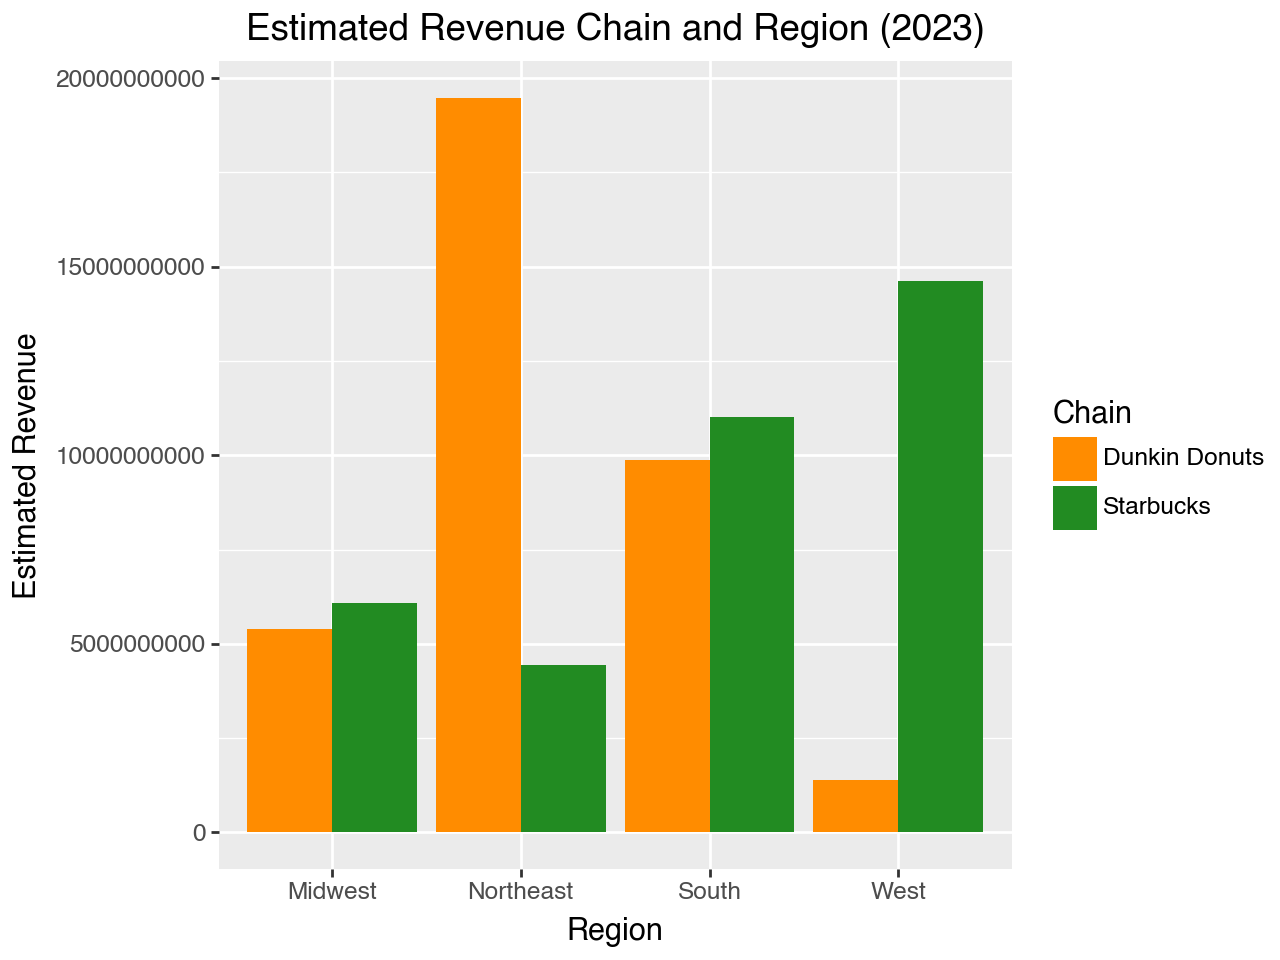

In [13]:
from plotnine import ggplot, geom_bar, aes, facet_wrap, labs, theme, element_text, scale_fill_manual
analyze = myDataCoffeePop
# First let us look at each region
analyze_region = analyze.drop(columns="State")
analyze_region = analyze_region.groupby("Region").sum().reset_index()

melted_data = analyze_region.melt(id_vars='Region', 
                                   value_vars=['Estimated Revenue 2023(Starbucks)', 'Estimated Revenue 2023(Dunkin Donuts)'], 
                                   var_name='Chain', 
                                   value_name='Estimated_Revenue_2023')

rev_per_reg = (ggplot(melted_data,
aes(
  x= "Region",
  y= "Estimated_Revenue_2023",
  fill= "Chain"
))
+ geom_bar(stat='identity', position='dodge')
+ labs(title= "Estimated Revenue Chain and Region (2023)",y="Estimated Revenue")
+ scale_fill_manual(
        values=['darkorange', 'forestgreen'],
        labels=['Dunkin Donuts', 'Starbucks'])
)
rev_per_reg.show()

From this graph we can see the popularity of the chains in different regions. We see in the West, Starbucks dominates the coffee industry where as in the Northeast, Dunkin' accumulates most of their revenue. On top of this, we see similar amounts of revenue in both the South and Midwest regions.

* How is the revenue divided for each state within the regions.

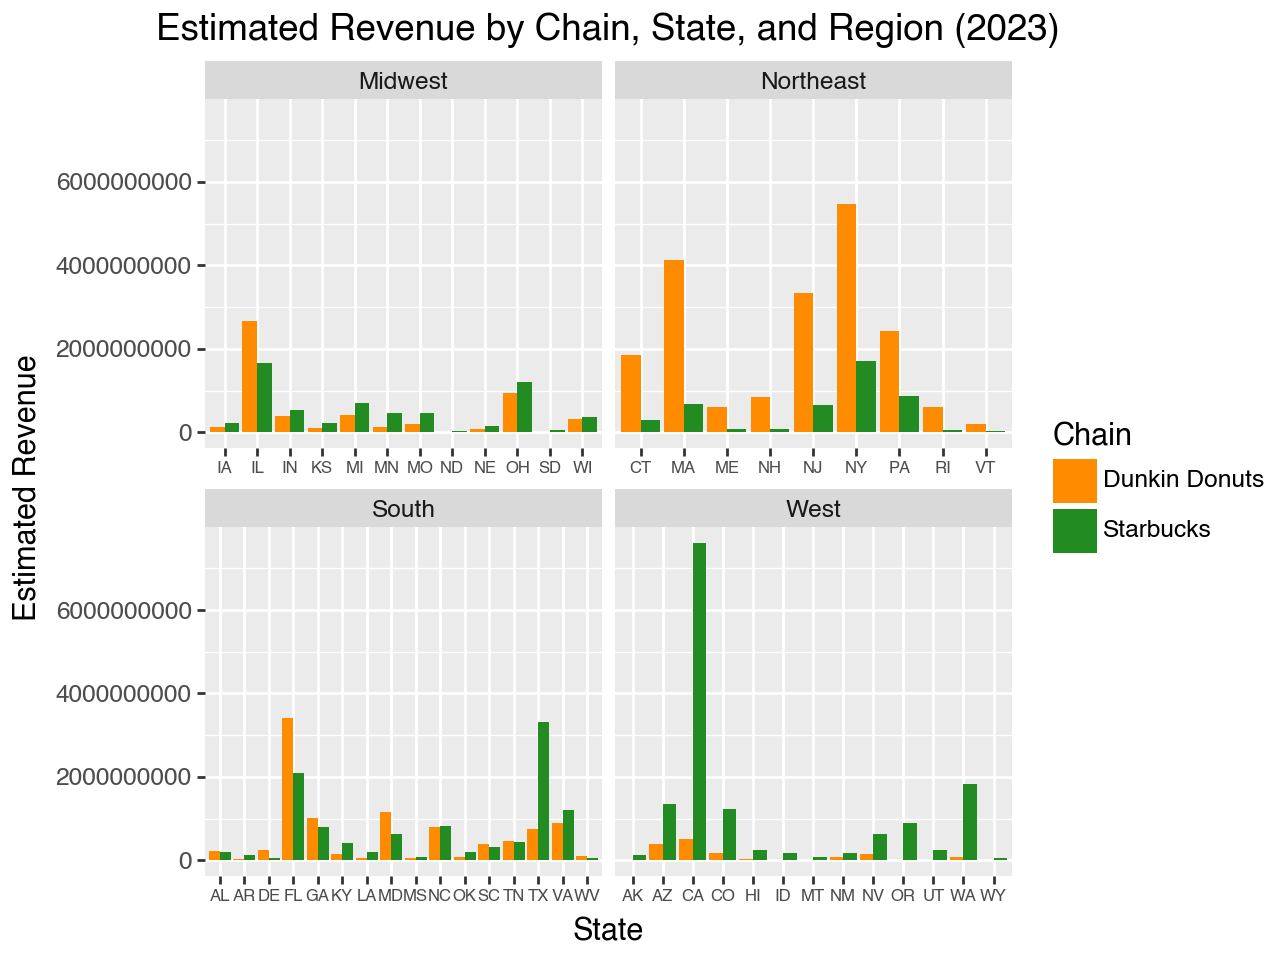

In [14]:
melted_data = analyze.melt(id_vars=['State', "Region"],
                                   value_vars=['Estimated Revenue 2023(Starbucks)', 'Estimated Revenue 2023(Dunkin Donuts)'], 
                                   var_name='Chain', 
                                   value_name='Estimated_Revenue_23')

rev_per_st = (ggplot(melted_data,
aes(
  x= "State",
  y= "Estimated_Revenue_23",
  fill= "Chain"
))
+ geom_bar(stat='identity', position='dodge')
+ facet_wrap('~Region', scales='free_x')
+ labs(title='Estimated Revenue by Chain, State, and Region (2023)',
         x='State',
         y='Estimated Revenue')
+  theme(
        axis_text_x=element_text(size=6))
+ scale_fill_manual(
        values=['darkorange', 'forestgreen'], 
        labels=['Dunkin Donuts', 'Starbucks']))
rev_per_st.show()

Diving in deeper to each region we can see that almost all of Starbucks' revenue in the West is coming from one state, CA. Whereas for Dunkin' in the Northeast they have multiple states helping reach their high revenue. Then in the Midwest and South regions, the two comapnies follow similar trends in for each state. 

* Does the distribution of each chain’s stores match population distribution, by both state/region?

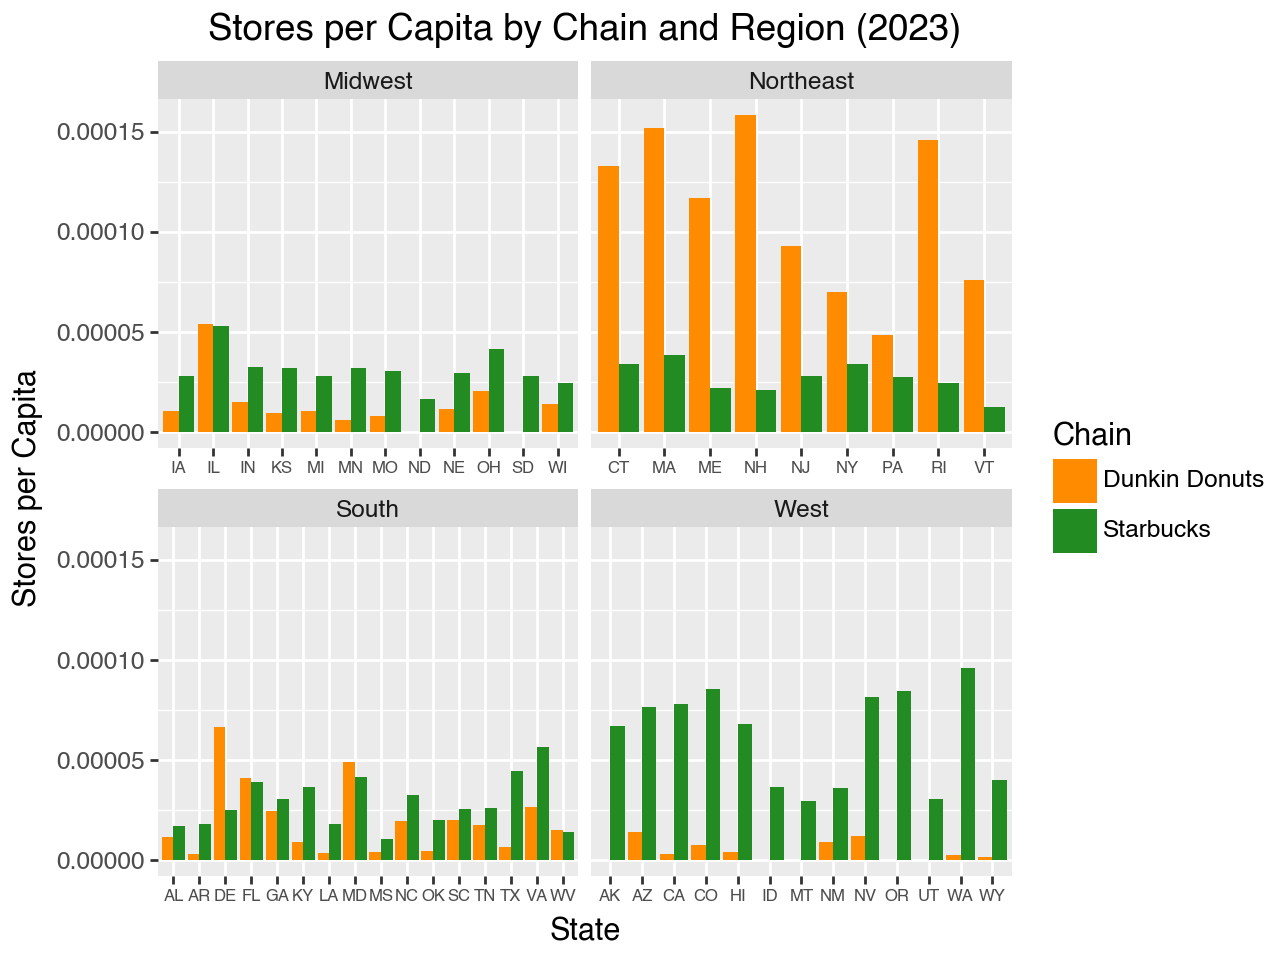

In [15]:
# Create a new column for stores per capita for both Starbucks and Dunkin'
analyze['Starbucks_per_capita'] = analyze['Location Count 2023(Starbucks)'] / analyze['Population']
analyze['Dunkin_per_capita'] = analyze['Location Count 2023(Dunkin Donuts)'] / analyze['Population']
melted_per_capita = analyze.melt(
    id_vars=['Region', 'State'], 
    value_vars=['Starbucks_per_capita', 'Dunkin_per_capita'], 
    var_name='Chain', 
    value_name='Stores_per_Capita'
)
capita = (
    ggplot(melted_per_capita, aes(x='State', y='Stores_per_Capita', fill='Chain')) +
    geom_bar(stat='identity', position='dodge') +
    facet_wrap('~Region', scales='free_x') + 
    labs(
        title='Stores per Capita by Chain and Region (2023)',
        x='State',
        y='Stores per Capita')
    +  theme(
        axis_text_x=element_text(size=6))
    + scale_fill_manual(
        values=['darkorange', 'forestgreen'], 
        labels=['Dunkin Donuts', 'Starbucks']))
capita.show()

Here, the height of the bars shows the density of stores relative to the population in each state or region. By comparing Starbucks and Dunkin' side by side, you can easily see whether one chain tends to have more stores per capita in specific regions. This follows our trends from before. In the Northeast, Dunkin has a very high density of stores compared to population, and this is reflected in their revenue there. Similar for the trends we saw in the other three regions. One thing that is interesting though, is how the density in California is relatively low compared to the revunue the state takes in for Starbucks. This tells us that Starbucks sells well in California. 

* Do the financial data match what you’d expect based on the number and locations of the stores? Why or why not?

Yes, since we used the store locations to distribute the revenue; thus, any analysis on revenue wll be the same for store locations. 

 - With a more filled out data set, we could do similar analysis on other years to see trends outside of 2023.


# Automate
Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should

* Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

* Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

* Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.

In [20]:
def scrape_table(URL, Company):
    response = requests.get(URL)
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table",
                  attrs={
                      "class": "wpr-table"})

    # Find counts for the Company in each State
    rows = []
    for row in table.find_all("tr")[1:]:
        state_name = row.find("a").text
        td_elements = row.find_all("td")
        num_years = len(td_elements)
        
        row_data = {"State": stateabb(state_name)}
        
        for i in range(num_years):
            num_locations = td_elements[i].get_text(strip=True)
            year = 2024 - i
            row_data[f"Location Count {year} ({Company})"] = num_locations
        
        rows.append(row_data)
    
    return pd.DataFrame(rows)

wallmartData = scrape_table('https://worldpopulationreview.com/state-rankings/walmart-stores-by-state', "Walmart")
wallmartData

,State,Location Count 2024 (Walmart)
0,TX,517
1,FL,341
2,CA,280
3,NC,192
4,GA,189
5,IL,161
6,OH,146
7,MO,137
8,TN,137
9,PA,134
